## weekdays_datasets

In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:

# Allows importing modules defined inside the project directory:
path = os.path.abspath(os.path.curdir)
while len(path) > 1 and not path.endswith('Mestrado'):
    path = os.path.abspath(os.path.join(path, '..'))
if path not in sys.path:
    sys.path.append(path)
sys.path.append('./MultiRocket')
print(sys.path)


['/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages', '/Users/carolina/Desktop/Mestrado', './MultiRocket']


In [3]:
df = pd.read_csv('weekdays_datasets/df_timeseries.csv')

Colunas CSV em weekdays_dataset.zip

h00-h23: Faixa de popularidade (0-1) entre meia-noite e onze da noite

country: 0 - Brasil, 1 - Estados Unidos

city: 0 - Curitiba, 1 - Rio de Janeiro, 2 - São Paulo, 0 - Chicago, 1 - New York, 2 - San Francisco

category: 0 - bakeries, 1 - bars, 2 - coffee, 3 - dance clubs, 4 - restaurants

In [4]:
df

,id,h00,h01,h02,h03,h04,h05,h06,h07,h08,...,h17,h18,h19,h20,h21,h22,h23,country,city,category
0,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.347754,0.522437,0.940441,0.823425,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.320058,0.212006,0.212006,0.212006,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.805263,0.483633,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.080787,0.303251,0.519247,...,0.986970,0.917125,0.562874,0.378466,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.060529,0.172893,...,0.878997,0.994609,0.901742,0.667729,0.387283,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12699,12699,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.430487,0.759348,0.991525,0.870099,0.588773,0.000000,0.000000,1.0,4.0,4.0
12700,12700,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.192508,0.564814,0.973335,0.966669,0.548366,0.000000,0.000000,1.0,4.0,4.0
12701,12701,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.571624,0.201609,0.144007,0.334674,0.000000,0.000000,0.000000,1.0,4.0,4.0
12702,12702,0.474252,0.256943,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.341396,0.630530,0.810973,0.971333,1.000000,0.897192,0.743494,1.0,4.0,4.0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:

def extract_x_y(df, country, city,category=None):
    if category is None:
        filtered_df = df[(df['country'] == country) & (df['city'] == city)]
    else:
        filtered_df = df[(df['country'] == country) & (df['city'] == city) & (df['category'] == category)]

    df_x = filtered_df.drop(columns=['id','country', 'city', 'category'])

    return np.array(df_x),np.array(filtered_df['category'])

X, y = extract_x_y(df,0,2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
print(X_train.shape, X_test.shape)

(1554, 24) (519, 24)


incluir testes pra (1) tudo/ (2) country somente/ (2) cidades
verificar percentagem de treinamento e teste
manter mesma quantidade de series
prompt chatgpt

In [7]:
dfs = pd.read_csv('weekdays_datasets/df_signatures.csv')
dfs

,id,h00,h01,h02,h03,h04,h05,h06,h07,h08,...,h17,h18,h19,h20,h21,h22,h23,country,city,category
0,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000119,...,0.896498,0.808148,0.462531,0.010060,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.003126,0.031889,0.234067,...,0.677492,0.475074,0.385600,0.248011,0.017268,0.000000,0.000000,0.0,0.0,0.0
2,2,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000174,0.009180,0.138568,...,0.972788,0.965489,0.831592,0.573811,0.275817,0.002511,0.000106,0.0,0.0,0.0
3,3,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.001596,0.043055,0.531299,...,0.775702,0.628683,0.533388,0.353358,0.008911,0.000000,0.000000,0.0,0.0,0.0
4,4,0.000000,0.000000,0.000000,0.00000,0.00000,0.000467,0.015091,0.179335,0.768777,...,0.412289,0.603218,0.448638,0.349549,0.154791,0.030829,0.000874,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,66,0.497889,0.302093,0.001882,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000041,0.005409,0.075049,0.140844,0.265839,0.581515,1.0,4.0,3.0
67,67,0.804521,0.541695,0.005939,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.076270,0.183042,0.224729,0.324142,0.479679,0.725018,0.896602,1.0,4.0,3.0
68,68,0.518485,0.394968,0.019825,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.556677,0.665041,0.706486,0.850784,0.827417,0.919327,0.747429,1.0,4.0,3.0
69,69,0.024066,0.000008,0.000000,0.00000,0.00002,0.000000,0.000000,0.000000,0.002157,...,0.327476,0.501589,0.829388,0.633860,0.500545,0.039253,0.019268,1.0,4.0,4.0


In [8]:
Xs, ys = extract_x_y(dfs,0,2)
Xs.shape

(9, 24)

## HIVECOTEV2

In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [10]:
from sktime.classification.hybrid import HIVECOTEV2
from sktime.classification.sklearn import RotationForest

In [11]:

hc2_classifier = HIVECOTEV2(
    stc_params={
        "estimator": RotationForest(n_estimators=3),
        "n_shapelet_samples": 100,
        "max_shapelets": 10,
        "batch_size": 20,
    },
    drcif_params={"n_estimators": 2, "n_intervals": 2, "att_subsample_size": 2},
    arsenal_params={"num_kernels": 50, "n_estimators": 3},
    tde_params={
        "n_parameter_samples": 10,
        "max_ensemble_size": 3,
        "randomly_selected_params": 5,
    },
)
hc2_classifier.fit(X_train, y_train)
print("predicting...")
hc2_pred = hc2_classifier.predict(X_test)
print("results...")
print(accuracy_score(y_test, hc2_pred))
print(f1_score(y_test, hc2_pred, average='weighted'))

/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


predicting...


/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


results...
0.7148362235067437
0.7089944474700713


In [12]:
print(precision_score(y_test, hc2_pred, average='weighted'))
print(recall_score(y_test, hc2_pred, average='weighted'))

0.7174199128925741
0.7148362235067437


validating signatures

In [13]:
hc2_pred_sig = hc2_classifier.predict(Xs)
print("validating signatures...")
accuracy_score(ys, hc2_pred_sig)

/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


validating signatures...


0.6666666666666666

HIVECOTE2 from aeon package (TODO)

In [14]:
from aeon.classification.hybrid import HIVECOTEV2

hc2_AEON = HIVECOTEV2(time_limit_in_minutes=0.2)
hc2_AEON.fit(X_train, y_train)
y_pred_hc2_AEON = hc2_AEON.predict(X_test)

accuracy_score(y_test, y_pred_hc2_AEON)

0.6782273603082851

In [15]:
print(accuracy_score(y_test, y_pred_hc2_AEON))
print(f1_score(y_test, y_pred_hc2_AEON, average='weighted'))
print(precision_score(y_test, y_pred_hc2_AEON, average='weighted'))
print(recall_score(y_test, y_pred_hc2_AEON, average='weighted'))

0.6782273603082851
0.6737410237307124
0.6737250331329254
0.6782273603082851


# Hydra

In [16]:
import torch

In [17]:
X_train_tensor = torch.tensor(np.expand_dims(X_train, axis=1), dtype=torch.float32)
X_test_tensor = torch.tensor(np.expand_dims(X_test, axis=1), dtype=torch.float32)
X_train_tensor.shape

torch.Size([1554, 1, 24])

In [18]:
X_test_tensor.shape

torch.Size([519, 1, 24])

In [19]:
from hydra import Hydra, SparseScaler
from sklearn.linear_model import RidgeClassifierCV

In [20]:
transform = Hydra(X_train.shape[-1])

X_training_transform = transform(X_train_tensor)
X_test_transform = transform(X_test_tensor)

scaler = SparseScaler()

X_training_transform = scaler.fit_transform(X_training_transform)
X_test_transform = scaler.transform(X_test_transform)

hydra_classifier = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10))
hydra_classifier.fit(X_training_transform, y_train)

hydra_pred = hydra_classifier.predict(X_test_transform)


In [21]:
X_test_transform.shape

torch.Size([519, 2048])

In [22]:
print(accuracy_score(y_test, hydra_pred))
print(f1_score(y_test, hydra_pred, average='weighted'))
print(precision_score(y_test, hydra_pred, average='weighted'))
print(recall_score(y_test, hydra_pred, average='weighted'))

0.720616570327553
0.711652129630557
0.7165267318720913
0.720616570327553


In [23]:
hydra_pred_sig = hydra_classifier.predict(transform(torch.tensor(np.expand_dims(Xs, axis=1), dtype=torch.float32)))
accuracy_score(ys, hydra_pred_sig)

0.6666666666666666

# MultiRocket

In [24]:
from multirocket.multirocket import MultiRocket
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# returns ntc format, remove the last dimension
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))

mrocket_classifier = MultiRocket(
    num_features=50000,
    classifier="logistic",
    verbose=2,
)
yhat_train = mrocket_classifier.fit(
    X_train, y_train,
    predict_on_train=False
)
mrocket_pred = mrocket_classifier.predict(X_test)

[MultiRocket] Creating MultiRocket with 6250 kernels
[MultiRocket] Training with training set of (1554, 24)


[MultiRocket] Kernels applied!, took 3.957101739000109s
[MultiRocket] Transformed Shape (1554, 49728)
[MultiRocket] Training


epoch: 0: 7it [00:01,  6.06it/s]                       
epoch: 1: 7it [00:00, 10.36it/s]                       
epoch: 2: 7it [00:00, 10.59it/s]                       
epoch: 3: 7it [00:00, 11.18it/s]                       
epoch: 4: 7it [00:00,  9.84it/s]                       
epoch: 5: 7it [00:00, 10.09it/s]                       
epoch: 6: 7it [00:00, 12.04it/s]                       
epoch: 7: 7it [00:00,  9.60it/s]                       
epoch: 8: 7it [00:00,  9.84it/s]                       
epoch: 9: 7it [00:00, 13.56it/s]                       
epoch: 10: 7it [00:00, 11.16it/s]                       
epoch: 11: 7it [00:00, 13.04it/s]                       
epoch: 12: 7it [00:00, 12.58it/s]                       
epoch: 13: 7it [00:00, 11.06it/s]                       
epoch: 14: 7it [00:02,  3.47it/s]                       
epoch: 15: 7it [00:00, 11.84it/s]                       
epoch: 16: 7it [00:00, 12.87it/s]                       
epoch: 17: 7it [00:00, 12.18it/s]        


<Stopped at Epoch 66>
[MultiRocket] Training done!, took 56.510s
[MultiRocket] Predicting
Kernels applied!, took 0.291s. Transformed shape: (519, 49728).
[MultiRocket] Predicting completed, took 0.460s


In [26]:
print(accuracy_score(y_test, mrocket_pred))
print(f1_score(y_test, mrocket_pred, average='weighted'))
print(precision_score(y_test, mrocket_pred, average='weighted'))
print(recall_score(y_test, mrocket_pred, average='weighted'))

0.7148362235067437
0.7116754779993167
0.7161019739271872
0.7148362235067437


In [27]:
mrocket_pred_sig = mrocket_classifier.predict(Xs)
accuracy_score(ys, mrocket_pred_sig)

[MultiRocket] Predicting
Kernels applied!, took 0.010s. Transformed shape: (9, 49728).
[MultiRocket] Predicting completed, took 0.025s


0.6666666666666666

In [28]:
from sktime.registry import all_estimators

all_estimators("classifier", as_dataframe=True)

,name,object
0,Arsenal,<class 'sktime.classification.kernel_based._ar...
1,BOSSEnsemble,<class 'sktime.classification.dictionary_based...
2,BaggingClassifier,<class 'sktime.classification.ensemble._baggin...
3,CNNClassifier,<class 'sktime.classification.deep_learning.cn...
4,CNTCClassifier,<class 'sktime.classification.deep_learning.cn...
5,CanonicalIntervalForest,<class 'sktime.classification.interval_based._...
6,Catch22Classifier,<class 'sktime.classification.feature_based._c...
7,ClassifierPipeline,<class 'sktime.classification.compose._pipelin...
8,ColumnEnsembleClassifier,<class 'sktime.classification.compose._column_...
9,ComposableTimeSeriesForestClassifier,<class 'sktime.classification.ensemble._ctsf.C...


# Distance based: classification is based on some time series specific distance measure between series

Distance based classifiers use a distance function to measure the similarity between time series.

## Rank 1 Proximity Forest

In [29]:
# Rank 1 Proximity Forest
from sktime.classification.distance_based import ProximityForest

clf_pf = ProximityForest(
    n_estimators=2, max_depth=2, n_stump_evaluations=1
) 
clf_pf.fit(X_train, y_train) 
y_pred_pf = clf_pf.predict(X_test) 

In [30]:
print(accuracy_score(y_test, y_pred_pf))
print(f1_score(y_test, y_pred_pf, average='weighted'))
print(precision_score(y_test, y_pred_pf, average='weighted'))
print(recall_score(y_test, y_pred_pf, average='weighted'))

0.2003853564547206
0.0669023340972422
0.04015429108148544
0.2003853564547206
Dataset:  PopularTimesGoogle
run  1
training time: 78.23099844199896
testing time: 2.5746762920025503
accuracy:  0.7225433526011561
run  2
training time: 78.27863508500741
testing time: 2.4364142030099174
accuracy:  0.7186897880539499
run  3
training time: 82.414580785
testing time: 2.7672528630064335
accuracy:  0.7263969171483622
run  4
training time: 69.78253212300478
testing time: 2.4869709159975173
accuracy:  0.720616570327553
run  5
training time: 78.00401102199976
testing time: 3.3445176380046178
accuracy:  0.7167630057803468
run  6
training time: 72.37027135099925
testing time: 2.5363138059910852
accuracy:  0.7109826589595376
run  7
training time: 78.88983450700471
testing time: 2.674804533002316
accuracy:  0.720616570327553
run  8
training time: 86.59350202399946
testing time: 2.9779428570036544
accuracy:  0.7167630057803468
run  9
training time: 77.94046570399951
testing time: 2.4876202489977004
accur

/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Rank 2 Elastic Ensemble

In [31]:
from aeon.classification.distance_based import ElasticEnsemble

clf_ee = ElasticEnsemble(
    proportion_of_param_options=0.1,
    proportion_train_for_test=0.1,
    distance_measures = ["dtw","ddtw"],
    majority_vote=True,
)
clf_ee.fit(X_train, y_train)

y_pred_ee = clf_ee.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred_ee)

0.6589595375722543

In [33]:
f1_score(y_test, y_pred_ee, average='weighted')

0.6484709733226177

In [34]:
precision_score(y_test, y_pred_ee, average='weighted')

0.6623744242183013

In [35]:
recall_score(y_test, y_pred_ee, average='weighted')

0.6589595375722543

# Feature based: global features are extracted and passed to a standard clas- sifier in a simple pipeline

## Rank 1 FreshPrince

In [36]:
from sktime.classification.feature_based import FreshPRINCE
#from sktime._contrib.vector_classifiers._rotation_forest import RotationForest

clf_freshPRINCE = FreshPRINCE(
    default_fc_parameters="minimal",
    n_estimators=5,
)
clf_freshPRINCE.fit(X_train, y_train)
FreshPRINCE(...)
y_pred_freshPRINCE = clf_freshPRINCE.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred_freshPRINCE)

0.6069364161849711

In [38]:
f1_score(y_test, y_pred_freshPRINCE, average='weighted')

0.6040857830187487

In [39]:
precision_score(y_test, y_pred_freshPRINCE, average='weighted')

0.6093545135750146

In [40]:
recall_score(y_test, y_pred_freshPRINCE, average='weighted')

0.6069364161849711

## Rank 2 TSFResh

In [41]:
from sktime.classification.feature_based import TSFreshClassifier
from sklearn.ensemble import RandomForestClassifier

clfTSFresh = TSFreshClassifier(
    default_fc_parameters="minimal",
    estimator=RandomForestClassifier(n_estimators=5),
)
clfTSFresh.fit(X_train, y_train)
TSFreshClassifier(...)
y_pred_TSFresh = clfTSFresh.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred_TSFresh)

0.6127167630057804

In [43]:
f1_score(y_test, y_pred_TSFresh, average='weighted')

0.6059869211170479

In [44]:
precision_score(y_test, y_pred_TSFresh, average='weighted')

0.6092231360283371

In [45]:
recall_score(y_test, y_pred_TSFresh, average='weighted')

0.6127167630057804

# Interval based: features are derived from selected phase dependent intervals in an ensemble of pipelines

Interval based classifiers adopt a random forest ensemble model, where each base classifier is a pipeline of transformation and a tree classifier

## Rank 1 DrCIF

The Diverse Representation Canonical Interval Forest (DrCIF)

In [46]:
from aeon.classification.compose import ChannelEnsembleClassifier
from aeon.classification.interval_based import DrCIFClassifier

from aeon.classification.convolution_based import RocketClassifier


cls_DrCIF = ChannelEnsembleClassifier(
    estimators=[
        ("DrCIF0", DrCIFClassifier(n_estimators=5, n_intervals=2), [0]),
        #("ROCKET3", RocketClassifier(num_kernels=1000), [3, 4]),
    ]
)

cls_DrCIF.fit(X_train, y_train)
y_pred_DrCIF = cls_DrCIF.predict(X_test)

accuracy_score(y_test, y_pred_DrCIF)

0.6994219653179191

In [47]:
f1_score(y_test, y_pred_DrCIF, average='weighted')

0.6941106691715099

In [48]:
precision_score(y_test, y_pred_DrCIF, average='weighted')

0.6984004827128549

In [49]:
recall_score(y_test, y_pred_DrCIF, average='weighted')

0.6994219653179191

## Rank 2 rSTSF

In [50]:
# Nestor Cabello, Elham Naghizade, Jianzhong Qi, Lars Kulik
# Fast, accurate and explainable time series classification through randomization.
# Data Min Know Disc (2023)

from rSTSF_functions import *

In [51]:
##Parameters that r-STSF uses

# Statistics or aggregation functions
# Note: np.percentile and np.quantile are just used as identifiers for 
# count mean-crossings (cmc) and count of values above mean (cam) statistics. See function getIntervalFeature(...)
agg_fns = [np.mean, np.std, np.polyfit, np.median, np.min, np.max, iqr, np.percentile, np.quantile]
repr_types = [1,2,3,4] # 1: Raw series, 2: Periodogram, 3: First-order Difference, 4: Autoregressive
d = 50 # Number of sets of candidate discriminatory interval features to compute
r = 500 # Number of trees

In [52]:
clf_rSTSF = rstsf(agg_fns=agg_fns, repr_types=repr_types[:1], d=1, r=2)
clf_rSTSF.fit(X_train,y_train)

In [53]:
dset_names = ["PopularTimesGoogle"]

nruns = 10

accuracies = np.zeros((len(dset_names),nruns))
training_times = []
testing_times = []

cont_dsets = 0
for dset_name in dset_names:
    print("Dataset: ", dset_name)

    inner_training_time = []
    inner_testing_time = []
    
    for nrun in range(nruns):
        print('run ',str(nrun+1))
        timeA = time.perf_counter()
        
        clf_rstsf = rstsf()
        clf_rstsf.fit(X_train, y_train)

        current_training_time = time.perf_counter()-timeA
        inner_training_time.append(current_training_time)
        print(f"training time: {current_training_time}")

        timeA = time.perf_counter()
        
        y_pred_rSTSF = clf_rstsf.predict(X_test)


        current_testing_time = time.perf_counter()-timeA
        inner_testing_time.append(current_testing_time)
        print(f"testing time: {current_testing_time}")

        accu = np.sum(y_pred_rSTSF==y_test)/len(y_test)
        print('accuracy: ', accu)
        accuracies[cont_dsets,nrun] = accu

    avg_accuracy_this_dataset = np.mean(accuracies[cont_dsets,:])
    print('avg accuracy for ' + str(nruns) + ' runs: ' , avg_accuracy_this_dataset)
    
    training_times.append(np.mean(inner_training_time))
    testing_times.append(np.mean(inner_testing_time))

    cont_dsets+=1
    print("\n")


## comment/uncomment the lines below according to the number of runs
columns = {'Dataset':dset_names,
           'run1':accuracies[:,0],
               'run2':accuracies[:,1],
               'run3':accuracies[:,2],
               'run4':accuracies[:,3],
               'run5':accuracies[:,4],
               'run6':accuracies[:,5],
               'run7':accuracies[:,6],
               'run8':accuracies[:,7],
               'run9':accuracies[:,8],
               'run10':accuracies[:,9],
           'avgAccu':np.mean(accuracies,axis=1),
           'avgTrainTime':np.array(training_times),'avgTestTime':np.array(testing_times)}
dfResults = pd.DataFrame(columns)
dfResults = dfResults[['Dataset',
                       'run1',
                           'run2',
                           'run3',
                           'run4',
                           'run5',
                           'run6',
                           'run7',
                           'run8',
                           'run9',
                           'run10',
                       'avgAccu','avgTrainTime','avgTestTime'
                      ]]


In [54]:
accu

0.7283236994219653

In [55]:
accuracy_score(y_test, y_pred_rSTSF)

0.7283236994219653

In [56]:
f1_score(y_test, y_pred_rSTSF, average='weighted')

0.7248243174375028

In [57]:
precision_score(y_test, y_pred_rSTSF, average='weighted')

0.7270271357245651

In [58]:
recall_score(y_test, y_pred_rSTSF, average='weighted')

0.7283236994219653

# Shapelet based: phase independent discriminatory subseries form the basis for classification

Shapelets are subseries from the training data that are independent of the phase and can be used to discriminate between classes of time series based on their presence or absence.

## Rank 1 Random Dilated Shapelet Transform (RDST)

In [59]:
from aeon.classification.shapelet_based import RDSTClassifier

rdst_AEON = RDSTClassifier()
rdst_AEON.fit(X_train, y_train)
y_pred_rdst_AEON = rdst_AEON.predict(X_test)

accuracy_score(y_test, y_pred_rdst_AEON)

0.7244701348747592

In [60]:
f1_score(y_test, y_pred_rdst_AEON, average='weighted')

0.7194743803990671

In [61]:
precision_score(y_test, y_pred_rdst_AEON, average='weighted')

0.7226053400069615

In [62]:
recall_score(y_test, y_pred_rdst_AEON, average='weighted')

0.7244701348747592

## Rank 2 MrSQM

Multiple Representations Sequence Miner

In [63]:
from mrsqm import MrSQMClassifier, MrSQMTransformer
from sklearn import metrics
from scipy.interpolate import interp1d
import timeit

from sklearn.linear_model import RidgeClassifierCV

In [64]:
#Train
clf_MrSQMC = MrSQMClassifier(nsax=0, nsfa=5)
clf_MrSQMC.fit(X_train,y_train)

y_pred_MrSQMC = clf_MrSQMC.predict(X_test)

Use MrSQM Transformer

In [65]:
tfm = MrSQMTransformer()
X_train_transform = tfm.fit_transform(X_train,y_train)
X_test_transform = tfm.transform(X_test)

In [66]:
# use ridgecv classifier
ridge = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10)).fit(X_train_transform,y_train)
y_pred_ridgecvt = ridge.predict(X_test_transform)
print(metrics.accuracy_score(y_test, y_pred_ridgecvt))

In [67]:
accuracy_score(y_test, y_pred_ridgecvt)

0.7032755298651252

In [68]:
f1_score(y_test, y_pred_ridgecvt, average='weighted')

0.6958375959599445

In [69]:
precision_score(y_test, y_pred_ridgecvt, average='weighted')

0.7037357367411607

In [70]:
recall_score(y_test, y_pred_ridgecvt, average='weighted')

0.7032755298651252

# Dictionary based: histograms of counts of repeating patterns are the fea- tures for a classifier

Similar to shapelet based algorithms, dictionary approaches extract phase- independent subseries. However, instead of measuring the distance to a sub- series, each window is converted into a short sequence of discrete symbols, commonly known as a word.

## Rank 1 Weasel-D

In [71]:
from aeon.datasets import load_arrow_head
from weasel.classification.dictionary_based import WEASEL_V2

clf_WEASEL_V2 = WEASEL_V2(random_state=1379, n_jobs=4)
clf_WEASEL_V2.fit(X_train,y_train)
y_pred_WEASEL_V2 = clf_WEASEL_V2.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred_WEASEL_V2)

0.7360308285163777

In [73]:
f1_score(y_test, y_pred_WEASEL_V2, average='weighted')

0.7294213917068679

In [74]:
precision_score(y_test, y_pred_WEASEL_V2, average='weighted')

0.7370612688531762

In [75]:
recall_score(y_test, y_pred_WEASEL_V2, average='weighted')

0.7360308285163777

## Rank 2 Temporal Dictonary Ensemble (TDE)

combines the best improvements introduced in WEASEL, SpatialBOSS and cBOSS and also includes several novel features.

In [76]:
from sktime.classification.dictionary_based import TemporalDictionaryEnsemble

clf_TDE = TemporalDictionaryEnsemble(
    n_parameter_samples=10,
    max_ensemble_size=3,
    randomly_selected_params=5,
) 
clf_TDE.fit(X_train, y_train) 
y_pred_TDE = clf_TDE.predict(X_test) 

In [77]:
accuracy_score(y_test, y_pred_TDE)

0.6801541425818882

In [78]:
f1_score(y_test, y_pred_TDE, average='weighted')

0.6761787147450342

In [79]:
precision_score(y_test, y_pred_TDE, average='weighted')

0.6811483887200471

In [80]:
recall_score(y_test, y_pred_TDE, average='weighted')

0.6801541425818882

# Convolution based: convolutions and pooling operations create the feature space for classification 

In [81]:
Hydra MultiRocket
MultiRocket
Hydra

SyntaxError: invalid syntax (1961490335.py, line 1)

# Deep learning based: neural network based classification

Deep learning has been the most active area of TSC research since the bake off in terms of the number of publications. 

## Rank 1 InceptionTime

In [9]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sktime.classification.deep_learning.inceptiontime import InceptionTimeClassifier

sns.set_style("whitegrid")

In [10]:
np.unique(y_train)

array([0., 1., 2., 3., 4.])

In [ ]:
network = InceptionTimeClassifier(n_epochs=10000, verbose=False)
network.fit(X_train, y_train)

InceptionTimeClassifier(n_epochs=10000)

In [ ]:
network.score(X_test, y_test)

0.32234432234432236

In [ ]:
y_pred_Inception = network.predict(X_test) 

In [ ]:
accuracy_score(y_test, y_pred_Inception)

0.32234432234432236

In [ ]:
f1_score(y_test, y_pred_Inception, average='weighted')

0.2848183686883983

In [ ]:
precision_score(y_test, y_pred_Inception, average='weighted')

0.7009681169705695

In [ ]:
recall_score(y_test, y_pred_Inception, average='weighted')

0.32234432234432236

In [12]:
from sktime.classification.deep_learning import InceptionTimeClassifier

# Instanciar o modelo
model = InceptionTimeClassifier()

# Listar os parâmetros disponíveis
print(model.get_params().keys())


dict_keys(['batch_size', 'bottleneck_size', 'callbacks', 'depth', 'kernel_size', 'loss', 'metrics', 'n_epochs', 'n_filters', 'random_state', 'use_bottleneck', 'use_residual', 'verbose'])


In [13]:
from sktime.classification.deep_learning import InceptionTimeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Defina o modelo
model = InceptionTimeClassifier()

# Defina os hiperparâmetros para a busca
param_grid = {
    'kernel_size': [32, 64, 128],
    'depth': [6, 12, 18],
    'batch_size': [16, 32, 64],
    'n_epochs': [50, 100, 200],
    # 'learning_rate': [0.001, 0.01, 0.1],
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')

# Ajustar o modelo aos dados
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros: ", grid_search.best_params_)
print("Melhor pontuação: ", grid_search.best_score_)


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms

## Rank 2 ResNet

In [ ]:
from sktime.classification.deep_learning.resnet import ResNetClassifier
clf_resnet = ResNetClassifier(n_epochs=10000) 
clf_resnet.fit(X_train, y_train)
y_pred_resnet = clf_resnet.predict(X_test) 

In [ ]:
accuracy_score(y_test, y_pred_resnet)

0.2271062271062271

In [ ]:
f1_score(y_test, y_pred_resnet, average='weighted')

0.1050650184187391

In [ ]:
precision_score(y_test, y_pred_resnet, average='weighted')

0.5068448963971353

In [ ]:
recall_score(y_test, y_pred_resnet, average='weighted')

0.2271062271062271

# Hybrid approaches combine two or more of the above approaches

## Rank 1 HIVE-COTE version 2 (HC2)

## Rank 2 Time Series Combination of Heterogeneous and Integrated Embeddings Forest TS-CHIEF

não encontrei o código/biblioteca

# Genetic Algorithms

In [ ]:
from scipy.optimize import minimize

N = 1
categ = 0
# X_ini = np.random.rand(N*24)
X_cat, y_cat = extract_x_y(df,0,0,categ)
X_avg = X_cat.mean(axis=0)
X_avg = np.pad(X_avg, ((2,2)), mode='constant', constant_values=0)

def fitness(X):
    X_np = np.array(X)
    X_sig = transform(torch.tensor(np.expand_dims(
        X_np.reshape(N,24),
        axis=1
    ), dtype=torch.float32))

    violated_constraints = np.maximum(0, X_np - 1.0) + np.maximum(0, 0.0 - X_np)
    penalty = sum(violated_constraints)
    distance = np.mean([np.min([np.linalg.norm(X_avg[x:x+24] - row) for x in range(5)]) for row in X_np.reshape(N, 24)])

    y = hydra_classifier.predict(X_sig)
    
    return accuracy_score([categ]*N, y), - penalty, - distance

# return accuracy_score([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5], y)
# return accuracy_score([0,1,2,3,4,5], y)
# res = minimize(fitness, X_ini, method = 'Nelder-Mead', options={'maxiter':100, 'disp':True,'fatol':0})
# res

In [ ]:
# fitness(X_ini)

In [ ]:
import numpy as np
import pygad

num_generations = 10000
num_parents_mating = 10
sol_per_pop = 50
num_genes = N*24

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=lambda ga, sol, i: fitness(sol),
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       random_mutation_min_val=-0.1,
                       random_mutation_max_val=0.1)

ga_instance.run()

print("Best solution:", ga_instance.best_solution())


In [ ]:
ga_instance.best_solution()

(array([0.01362603, 0.01088563, 0.01076658, 0.00566182, 0.01357704,
        0.19008531, 0.39125168, 0.48478115, 0.4647077 , 0.44011196,
        0.46602354, 0.47079004, 0.48122378, 0.5386247 , 0.67896835,
        0.75474742, 0.67783663, 0.45983365, 0.25521616, 0.21586405,
        0.06883266, 0.01615042, 0.00264618, 0.00108969]),
 array([ 1.        , -0.        , -0.00988973]),
 0)

In [ ]:
ga_instance.num_generations = 9000
ga_instance.run()
ga_instance.best_solution()

(array([1.43259577e-02, 1.24309025e-02, 1.07665806e-02, 9.46031175e-03,
        1.35770362e-02, 1.90085311e-01, 3.91303728e-01, 4.84781150e-01,
        4.64707697e-01, 4.36796487e-01, 4.64545095e-01, 4.70756179e-01,
        4.78358985e-01, 5.41338703e-01, 6.83916835e-01, 7.54747422e-01,
        6.77836629e-01, 4.59833647e-01, 2.53343983e-01, 2.17507729e-01,
        6.37047521e-02, 1.52418963e-02, 5.31287624e-04, 1.29650917e-03]),
 array([ 1.        , -0.        , -0.00655205]),
 0)

In [ ]:
sorted(ga_instance.last_generation_fitness,key=lambda x: x[0])

[array([ 1.        , -0.        , -0.00655205]),
 array([ 1.        , -0.        , -0.08766666]),
 array([ 1.        , -0.        , -0.08621751]),
 array([ 1.        , -0.06796937, -0.0760524 ]),
 array([ 1.        , -0.        , -0.08963265]),
 array([ 1.        , -0.        , -0.11340518]),
 array([ 1.        , -0.03802613, -0.07233255]),
 array([ 1.       , -0.       , -0.1155542]),
 array([ 1.        , -0.03473367, -0.06800981]),
 array([ 1.       , -0.       , -0.1320281]),
 array([ 1.        , -0.        , -0.02605693]),
 array([ 1.       , -0.       , -0.0389118]),
 array([ 1.        , -0.02726243, -0.08887823]),
 array([ 1.        , -0.00633809, -0.06437736]),
 array([ 1.        , -0.        , -0.10426858]),
 array([ 1.        , -0.03830265, -0.15442425]),
 array([ 1.       , -0.       , -0.1094665]),
 array([ 1.        , -0.01994966, -0.06578777]),
 array([ 1.        , -0.00552953, -0.06605018]),
 array([ 1.        , -0.        , -0.08322107]),
 array([ 1.        , -0.        

In [ ]:
ga_instance.generations_completed

19000

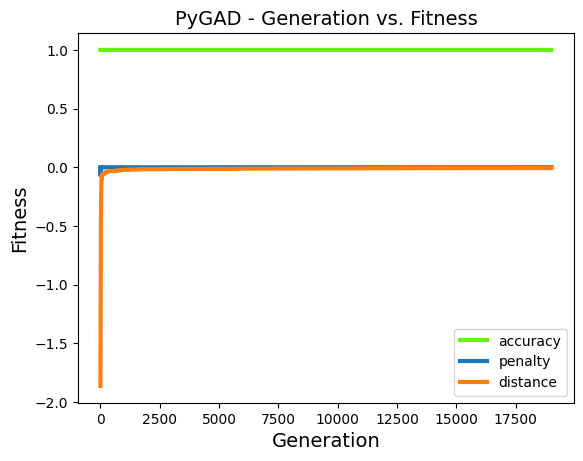

In [ ]:
fig = ga_instance.plot_fitness(label=['accuracy','penalty','distance'])
fig.legend()

In [ ]:
ga_instance.last_generation_fitness

array([[ 1.        , -0.        , -0.00655205],
       [ 1.        , -0.        , -0.08766666],
       [ 1.        , -0.        , -0.08621751],
       [ 1.        , -0.06796937, -0.0760524 ],
       [ 1.        , -0.        , -0.08963265],
       [ 1.        , -0.        , -0.11340518],
       [ 1.        , -0.03802613, -0.07233255],
       [ 1.        , -0.        , -0.1155542 ],
       [ 1.        , -0.03473367, -0.06800981],
       [ 1.        , -0.        , -0.1320281 ],
       [ 1.        , -0.        , -0.02605693],
       [ 1.        , -0.        , -0.0389118 ],
       [ 1.        , -0.02726243, -0.08887823],
       [ 1.        , -0.00633809, -0.06437736],
       [ 1.        , -0.        , -0.10426858],
       [ 1.        , -0.03830265, -0.15442425],
       [ 1.        , -0.        , -0.1094665 ],
       [ 1.        , -0.01994966, -0.06578777],
       [ 1.        , -0.00552953, -0.06605018],
       [ 1.        , -0.        , -0.08322107],
       [ 1.        , -0.        , -0.063

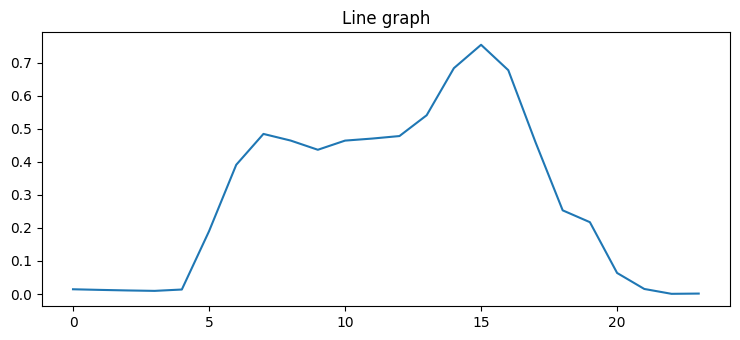

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = range(24)
y,fit,idx = ga_instance.best_solution()

plt.title("Line graph")
for y_ in np.array(y).reshape(N,24):
    plt.plot(x, y_)

plt.show()

In [ ]:
ga_instance.save('ga_1sig_ng100_npm10_spp50_categ0_10000')

TRANSFORMERS
DTW VS TRANSFORMERS TIME SERIES
MÉTRICAS (f1-score)

OVERLEAF

ESTUDO (RELATÓRIO)
- CLASSIFICADORES (NOVAS TÉCNICAS)
- DEEP LEARNING (SUMARIZAÇÃO)
- OUTRAS TÉCNICAS (SUMARIZAÇÃO / LEVANTAMENTO)
- TESTES-PILOTO 
- USO DAS ASSINATURAS (parâmetros dos classificadores (talvez))

- aplicar em outros datasets

In [ ]:
#teste
import numpy as np

# Define input signal and kernel
signal = np.array([0, 0, 1, 2, 3, 4, 5, 0, 0])
kernel = np.array([0, 0.5, 1, 1.5, 0])

# Perform 1D convolution
result = np.correlate(signal, kernel, mode='valid')

print("Convolution result:", result)
result.max()


13.0

In [ ]:
#teste
two_d = np.array([
    [1,2],
    [3,4]
])

np.mean([np.correlate(
    np.array([1,2,3,4]),
    row
).max() for row in two_d])

18.0

## Reunião 16/02

*verificar se é bom ou não o uso de algoritmos genéticos

*comparar com a geração simples de signature pela média do dataframe

*ver os transformers

*ver se tem mais classificadores interessantes

*M2 do Leonardo

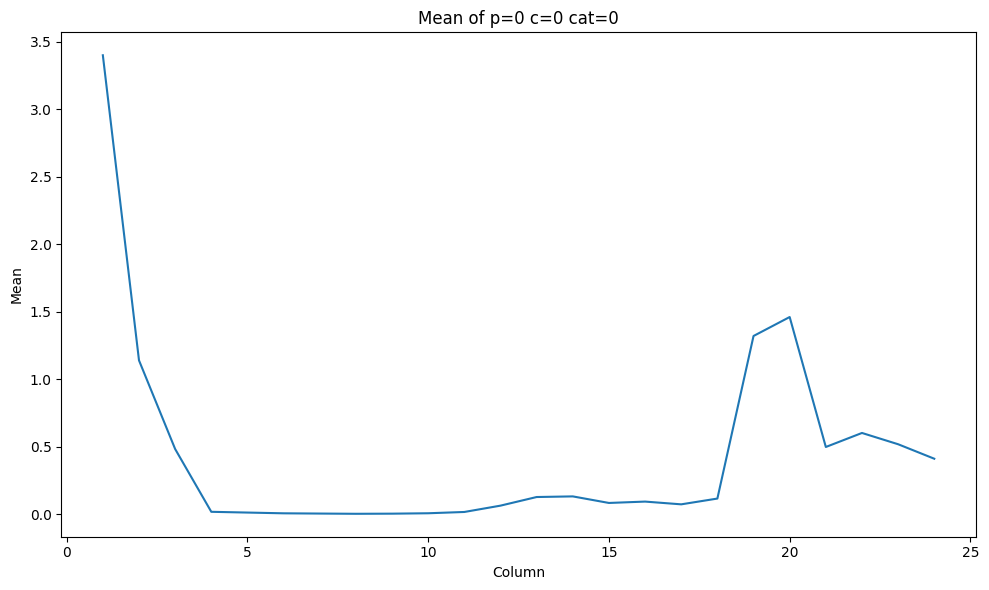

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_filtrado = df[(df['country'] == 0) & (df['city'] == 0) & (df['category'] == 1)]
df_teste = df_filtrado.drop(columns=['id','country', 'city', 'category'])

column_means = np.mean(df_teste, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), column_means)

plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('Mean of p=0 c=0 cat=0')

plt.show()

In [ ]:
def extract_avg(country, city, cat):
    df_filtrado = df[(df['country'] == country) & (df['city'] == city) & (df['category'] == cat)]
    df_teste = df_filtrado.drop(columns=['id','country', 'city', 'category'])
    column_means = np.mean(df_teste, axis=0)
    return column_means

In [ ]:
X_test_new = np.array([
    extract_avg(0,0,0),
    extract_avg(0,0,1),
    extract_avg(0,0,2),
    extract_avg(0,0,3),
    extract_avg(0,0,4)
    ])

In [ ]:
X_test_tensor_new = torch.tensor(np.expand_dims(X_test_new, axis=1), dtype=torch.float32)
X_test_tensor_new.shape

torch.Size([5, 1, 24])

In [ ]:
y_test_new = [0,1,2,3,4]

## New Hydra

In [ ]:
from hydra import Hydra, SparseScaler
from sklearn.linear_model import RidgeClassifierCV

X_test_transform_new = transform(X_test_tensor_new)

X_test_transform_new = scaler.transform(X_test_transform_new)

hydra_pred_new = hydra_classifier.predict(X_test_transform_new)

print(accuracy_score(y_test_new, hydra_pred_new))
print(f1_score(y_test_new, hydra_pred_new, average='weighted'))